Madaraka Estate


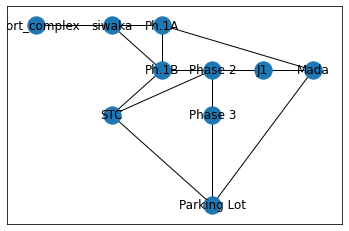

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()

#this are the  places

G.add_edges_from([("sport_complex" ,"siwaka") , ("siwaka" ,"Ph.1A") , ("siwaka", "Ph.1B") , ("Ph.1A" ,"Mada"), ( "Ph.1A", "Ph.1B"), ("Ph.1B", "STC"), ( "Ph.1B", "Phase 2"), ( "STC","Phase 2"), ( "STC", "Parking Lot"), ("Phase 2" ,"Phase 3"), ( "Phase 2", "J1"), ( "J1", "Mada"), ("Mada", "Parking Lot"), ( "Phase 3", "Parking Lot") ])

pos = { "sport_complex": (10, 90), "siwaka": (25, 90), "Ph.1A": (35, 90), "Ph.1B": (35, 80), "STC": (35, 70), "Phase 2": (45, 80), "J1": (55, 80), "Mada": (65, 80), "Phase 3": (45, 70), "Parking Lot": (45, 50) } 

nx.draw_networkx(G, pos=pos)

print("Madaraka Estate")

plt.show()

In [2]:
from queue import PriorityQueue
v = 14
graph = [[] for i in range(v)]

# Function For Implementing Best First Search
# Gives output path having lowest cost


def best_first_search(actual_Src, target, n):
    visited = [False] * n
    pq = PriorityQueue()
    pq.put((0, actual_Src))
    visited[actual_Src] = True
    
    while pq.empty() == False:
        u = pq.get()[1]
        # Displaying the path having lowest cost
        green='\033[32m'
        reset= '\033[m' 
        print(green,u,reset, end=" ")
        if u == target:
            break

        for v, c in graph[u]:
            if visited[v] == False:
                visited[v] = True
                pq.put((c, v))
    print()

# Function for adding edges to graph


def addedge(x, y, cost):
    graph[x].append((y, cost))
    graph[y].append((x, cost))


# The nodes shown in the graph(by alphabets) are
# implemented using integers addedge(x,y,cost);
addedge(0, 0,730)
addedge(0, 1,405)
addedge(1, 2, 380)
addedge(2, 3,280)
addedge(1, 3, 280)
addedge(3, 4, 213)
addedge(4, 5, 210)
addedge(3, 5, 210)
addedge(5, 6, 160)
addedge(6, 7, 0)
addedge(7, 8, 630)
addedge(8, 2, 380)
addedge(8, 9, 500)
addedge(9, 5, 210)


source = 0
target = 7
best_first_search(source, target, v)

 0   1   3   5   6   7  


In [3]:
from colorama import Fore

graph_1 ={
    'Sports Complex':[('Siwaka',450)],
    'Siwaka':[('Ph.1A',10),('Ph.1B',230)],
    'Ph.1A':[('Ph.1B',100),('Mada',850)],
    'Ph.1B':[('STC',50),('Phase 2',112)],
    'STC':[('Phase 2',50),('Parking Lot',250)],
    'Phase 2':[('J1',600),('Phase 3',500)],
    'J1':[('Mada',200)],
    'Phase 3':[('Parking Lot',350)],
    'Mada':[('Parking Lot',700)]
}

def path_cost(path):
    total_cost=0
    for(node,cost) in path:
        total_cost += cost
    return total_cost, path[-1][0]


def ucs(graph_1,start,goal):
    visited = []
    queue = [[(start,0)]]
    while queue:
        queue.sort(key=path_cost)
        path = queue.pop(0)
        node = path[-1][0]
        if node in visited:
            continue
        visited.append(node)
        if node == goal:
            return path
        else:
            adjacent_nodes=graph_1.get(node,[])
            for(node2,cost) in adjacent_nodes:
                new_path = path.copy()
                new_path.append((node2,cost))
                queue.append(new_path)
                
solution = ucs(graph_1,'Sports Complex','Parking Lot')
print(Fore.YELLOW+'Uniform Cost Search :'+Fore.RED, solution , 'Cost: ', path_cost(solution)[0])

Uniform Cost Search : [('Sports Complex', 0), ('Siwaka', 450), ('Ph.1A', 10), ('Ph.1B', 100), ('STC', 50), ('Parking Lot', 250)] Cost:  860
